# Day 3
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/mr0a/AI_by_Sarthak/blob/master/PolynomialRegression_Test_Train_and_R2Score.ipynb)

# Polynomial Regression

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.describe()

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,64.263804,107.723926,134.226994,382.368098,4.386503,7.680982
std,42.994520,14.625062,16.403967,274.227106,3.923772,0.663934
min,15.000000,80.000000,100.000000,50.000000,0.000000,5.000000
25%,45.000000,100.000000,124.000000,256.500000,0.000000,7.500000
50%,60.000000,105.000000,131.000000,320.000000,5.000000,8.000000
75%,60.000000,111.000000,141.000000,388.500000,8.000000,8.000000
max,300.000000,159.000000,184.000000,1860.000000,11.000000,12.000000


### Feature Selection

In [12]:
features = ['Duration',	'Average_Pulse',	'Max_Pulse',	'Calorie_Burnage',	'Hours_Work']

In [13]:
target = ['Hours_Sleep']

In [16]:
X = df[features]

In [17]:
y = df[target]

### Model Training

In [19]:
from sklearn import linear_model

In [20]:
regr = linear_model.LinearRegression()

In [21]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
regr.coef_ # Weightage of feature in predicting

array([[ 5.97320275e-04, -4.98219018e-03,  5.87937494e-03,
         6.57663989e-06, -2.21627241e-02]])

In [27]:
regr.predict([[60, 110,	130,	409,	0.0]])

array([[7.73963483]])

In [32]:
df

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,60,110,130,409,0.0,8.0
1,60,117,145,479,0.0,8.0
2,60,103,135,340,8.0,7.5
3,45,109,175,282,8.0,8.0
4,45,117,148,406,0.0,6.5
...,...,...,...,...,...,...
158,60,105,140,290,7.0,8.0
159,60,110,145,300,7.0,8.0
160,60,115,145,310,8.0,8.0
161,75,120,150,320,0.0,8.0


# Scale Features

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()

In [35]:
scaledX = scale.fit_transform(X)

In [ ]:
print(scaledX)

In [37]:
regr2 = linear_model.LinearRegression()

In [39]:
regr2.fit(scaledX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
scaledTest = scale.transform([[60,	110,	130,	409,	0.0]])

In [49]:
scaledTest

array([[-0.09947648,  0.1561079 , -0.25847529,  0.09741551, -1.12137515]])

In [50]:
[scaledTest[0]]

[array([-0.09947648,  0.1561079 , -0.25847529,  0.09741551, -1.12137515])]

In [48]:
regr2.predict([scaledTest[0]])

array([[7.73963483]])

# Train / Test

In [52]:
import numpy

In [53]:
import matplotlib.pyplot as plt

In [54]:
numpy.random.seed(2)

In [59]:
x = numpy.random.normal(3,1,100)

In [60]:
y = numpy.random.normal(150, 40, 100)/x

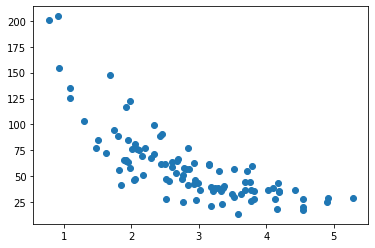

In [62]:
plt.scatter(x, y)

In [66]:
train_x = x[:80]
train_y = y[:80]

In [64]:
test_x = x[80:]
test_y = y[80:]

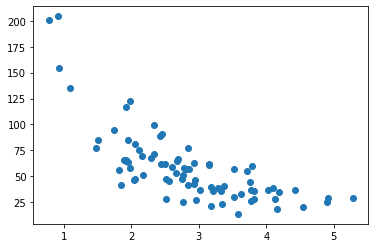

In [67]:
plt.scatter(train_x, train_y)

In [89]:
polymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

In [90]:
polyline = numpy.linspace(0, 6, 100)

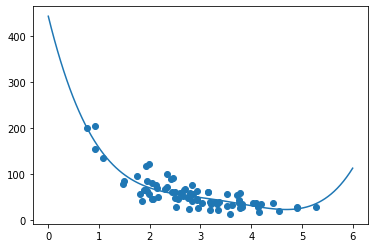

In [91]:
plt.plot(polyline, polymodel(polyline))
plt.scatter(train_x, train_y)
plt.show()

# R Square of R2 Score
### The relation between x and y
- The relation is very good if r2 score is .9 or more

In [92]:
from sklearn.metrics import r2_score

In [94]:
r2 = r2_score(train_y, polymodel(train_x))
r2

0.7690986185168589

In [95]:
r2_score(test_y, polymodel(test_x))

0.7327894851349233